In [44]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x, L ,x0, k, b):
    #x input data
    # L scales output from [0,L]
    # x0 is the midpoint
    # k scales the input
    # b is the offset of output to [b,L+b]
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def toyData(function = sigmoid, k = 1, x0 = 0, L = 1, b = 0, mu = 0, std = 0.05):
    

    x = np.linspace(-10, 10, 100)  # 100 linearly spaced numbers from -10 to 10
    noise = np.random.normal(mu, std, x.shape)
    x_noisy = x + noise

    y = function(x_noisy, L ,x0, k, b)
    y_noisy = y + noise
     
    return(x_noisy,y_noisy)

def fitCurve(x, y, function = sigmoid):
    p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
    popt, pcov = curve_fit(function, x, y,p0, method='dogbox')
    fit_y = sigmoid(x, *popt)

    return(fit_y)



x,y_noisy = toyData()
fit_y = fitCurve(x, y_noisy)

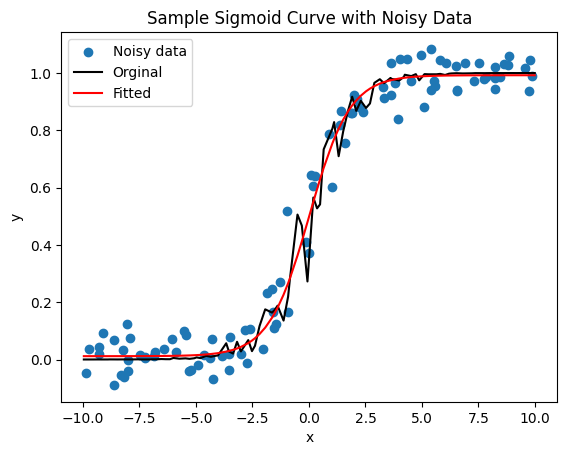

In [45]:
plt.scatter(x_noisy, y_noisy, label='Noisy data')
plt.plot(x, y, 'k-', label='Orginal')
plt.plot(x, fit_y, 'r-', label='Fitted')
plt.title('Sample Sigmoid Curve with Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
